<a href="https://colab.research.google.com/github/pgordin/SMAD_2024/blob/main/Algorytmy_kNN_kd_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plan prezentacji

* Sortowanie i wybieranie
  * proste algorytmy sortujące
  * algorytm QuickSort
  * algorytm QuickPos / QuickSelection (szybkie statystyki pozycyjne)
* Drzewa BST jako przykład struktury drzewiastej
* Klasyfikacja najbliższego sąsiada w ujęciu algorytmicznym
  * gotowy algorytm $k$-NN
  * rozwiązanie naiwne, nieefektywne
  * podejcie przez $kd$-drzewa


# Sortowanie



## Zadanie

Zaimplementować prosty algorytm sortowania (bąbelkowe, przez wstawianie).

In [ ]:
import numpy as np

#lista
tablica1 = [np.random.randint(1, 100000) for i in range(0,10)]
tablica2 = tablica1.copy()
tablica2.sort()
print(tablica1)
print(tablica2)

# sortowanie bąbelkowe
def bubblesort(tablica):
  for j in range(len(tablica)):
    for i in range(1, len(tablica)):
      if tablica[i-1] > tablica[i]:
        tablica[i-1], tablica[i] = tablica[i], tablica[i-1]
  return tablica

def bubblesort2(tablica):
  zmiana = True
  while zmiana:
    zmiana = False
    for i in range(1, len(tablica)):
      if tablica[i-1] > tablica[i]:
        tablica[i-1], tablica[i] = tablica[i], tablica[i-1]
        zmiana = True
  return tablica

# sortowanie przez wstawianie
def insertionsort(tablica):
  for i in range(1, len(tablica)):
    x = tablica[i]
    j = i-1
    while j >=0 and tablica[j] > x:
      tablica[j+1] = tablica[j]
      j -= 1
    tablica[j+1] = x
  return tablica

tablica2 = tablica1.copy()
bubblesort2(tablica2)
print(tablica2)

tablica2 = tablica1.copy()
insertionsort(tablica2)
print(tablica2)



[9844, 39621, 66130, 3092, 30583, 2607, 66291, 54682, 21144, 89852]
[2607, 3092, 9844, 21144, 30583, 39621, 54682, 66130, 66291, 89852]
[2607, 3092, 9844, 21144, 30583, 39621, 54682, 66130, 66291, 89852]
[2607, 3092, 9844, 21144, 30583, 39621, 54682, 66130, 66291, 89852]


In [ ]:
# jak szybko to działa
n = 1000
tablica1 = [np.random.randint(1, 100000) for i in range(0,n)]


def test1(tablica1):
  tablica2 = tablica1.copy()
  tablica2.sort()

%timeit test1(tablica1)

def test2(tablica1, funkcja):
  tablica2 = tablica1.copy()
  funkcja(tablica2)

%timeit test2(tablica1, bubblesort)
%timeit test2(tablica1, bubblesort2)
%timeit test2(tablica1, insertionsort)



129 µs ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
219 ms ± 63.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
165 ms ± 27.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
42.5 ms ± 602 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)



## Sortowanie szybkie

In [ ]:
"""
QuickSort po mojemu
"""

def QuickSort(tablica):
    # sortowanie szybkie
    def QSort(d, g):
        # pomocnicza procedura - sortuje fragment od d do g
        i = d
        j = g
        x = tablica[np.random.randint(d, g+1)]
        while i <= j:
            while tablica[i] < x:
                i += 1
            while tablica[j] > x:
                j -= 1
            if i <= j:
                tablica[i], tablica[j] = tablica[j], tablica[i]
                i += 1
                j -= 1
        if d < j:
            QSort(d, j)
        if i < g:
            QSort(i, g)

    QSort(0, len(tablica)-1)

In [ ]:
# Test lista
tablica1 = [np.random.randint(1, 100000) for i in range(0,100)]
tablica2 = tablica1.copy()
tablica2.sort()
print(tablica2)
#print(tablica1)
QuickSort(tablica1)
print(tablica1)

#numpy
tablica3 = (np.random.randint(1, 100000, size = 100))
tablica3.sort()
print(tablica3)

n = 10000

def test1(n):
  tablica1 = [np.random.randint(1, 100000) for i in range(0,n)]
  QuickSort(tablica1)

%timeit test1(n)

def test2(n):
  tablica1 = [np.random.randint(1, 100000) for i in range(0,n)]
  tablica1.sort()

%timeit test2(n)

def test3(n):
  tablica2 = (np.random.randint(1, 100000, size = n))
  QuickSort(tablica2)

%timeit test3(n)

def test4(n):
  tablica2 = (np.random.randint(1, 100000, size = n))
  tablica2.sort()

%timeit test4(n)


[4900, 5381, 5915, 6639, 6899, 7321, 7951, 8366, 9735, 9789, 9809, 10205, 10952, 12076, 12145, 12655, 12913, 13552, 14758, 15368, 15387, 17221, 22818, 23904, 24428, 24497, 26334, 26479, 26751, 27086, 27414, 27904, 28169, 28175, 28720, 29911, 29926, 30219, 30628, 30720, 31893, 32276, 32657, 38150, 41187, 41769, 42576, 43049, 43585, 46305, 48144, 48162, 48242, 48281, 49090, 49340, 50464, 52649, 53208, 53309, 54662, 54807, 57234, 57866, 58373, 58656, 60399, 60706, 61172, 61920, 65618, 65859, 66871, 68227, 68470, 69910, 73096, 75605, 76227, 76348, 76970, 77260, 78420, 81792, 81935, 86560, 87477, 90262, 90998, 91559, 92057, 92694, 92737, 93080, 94321, 96800, 97125, 98986, 99055, 99448]
[4900, 5381, 5915, 6639, 6899, 7321, 7951, 8366, 9735, 9789, 9809, 10205, 10952, 12076, 12145, 12655, 12913, 13552, 14758, 15368, 15387, 17221, 22818, 23904, 24428, 24497, 26334, 26479, 26751, 27086, 27414, 27904, 28169, 28175, 28720, 29911, 29926, 30219, 30628, 30720, 31893, 32276, 32657, 38150, 41187, 41769

### Zadanie

Przerobić powyższy kod na wyznaczanie statystyk pozycyjnych.

In [ ]:
def QuickPos(tablica, m):
    # szybkie statystyki pozycyjne - szukamy m-tego najmniejszego elementu w tablicy
    def QPos(d, g, m):
        # pomocnicza procedura - przeszukuje fragment od d do g
        i = d
        j = g
        x = tablica[np.random.randint(d, g+1)]
        while i <= j:
            while tablica[i] < x:
                i += 1
            while tablica[j] > x:
                j -= 1
            if i <= j:
                tablica[i], tablica[j] = tablica[j], tablica[i]
                i += 1
                j -= 1
        if d < j and m <= j:
            QPos(d, j, m)
        if i < g and m >= i:
            QPos(i, g, m)

    QPos(0, len(tablica)-1, m)
    return tablica[m]


Sprawdzenie, czy działa.

In [ ]:
tablica1 = [np.random.randint(1, 100000) for i in range(0,100)]
tablica2 = tablica1.copy()
QuickSort(tablica1)
print(tablica1)
print(QuickPos(tablica2, 5))

n = 10000

tablica1 = [np.random.randint(1, 100000) for i in range(0,n)]

def test5(tablica):
  tablica2 = tablica.copy()
  QuickPos(tablica2, 100)

def test6(tablica):
  tablica2 = tablica.copy()
  QuickSort(tablica2)


%timeit test5(tablica1)
%timeit test6(tablica1)

[930, 1502, 1759, 1906, 4873, 6813, 8468, 8975, 10013, 10037, 10260, 10351, 10900, 14705, 15414, 15984, 16361, 16432, 17646, 18297, 21122, 21325, 21769, 23005, 24169, 24673, 26021, 26160, 26500, 26741, 28314, 28975, 29085, 29548, 32996, 33638, 33650, 33694, 34695, 36980, 38906, 39273, 40848, 40857, 43559, 46810, 48840, 49125, 49765, 50089, 51348, 58554, 61095, 61161, 61276, 63515, 64373, 65458, 66421, 67319, 68093, 68299, 69994, 70422, 70707, 70800, 73912, 74338, 76012, 77033, 77361, 77531, 77694, 78119, 78213, 79373, 79663, 79813, 80042, 84095, 85279, 85777, 86101, 86786, 87521, 87899, 88307, 88491, 91036, 91396, 92192, 92219, 92982, 93589, 94561, 96059, 96685, 98266, 98547, 98633]
6813
2.92 ms ± 783 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
61 ms ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Drzewa BST

Podstawowe funkcje do drzew BST.

In [ ]:
def new_node(value):
  """
  Nowy wierzchołek drzewa
  """
  return {'val': value, 'n': 1, 'left': None, 'right': None}

In [ ]:
def add_value(tree, value):
  """
  Dodanie nowej wartości do drzewa
  """
  if value < tree['val']:   # dodaj do lewego poddrzewa
    if tree['left'] is None:
      tree['left'] = new_node(value)
    else:
      add_value(tree['left'], value)
  elif value > tree['val']: # dodaj do prawego poddrzewa
    if tree['right'] is None:
      tree['right'] = new_node(value)
    else:
      add_value(tree['right'], value)
  else:
    tree['n'] += 1  # wartość już jest - doliczmy wystapienie

Wypisywanie zawartości drzewa.

In [ ]:
def print_inorder(tree):
  """
  Wypisanie zawartości drzewa
  """
  if tree['left'] is not None:
    print_inorder(tree['left'])
  print("{v}: {n}".format(v = tree['val'], n = tree['n']))
  if tree['right'] is not None:
    print_inorder(tree['right'])

## Przykłady działania

In [ ]:
tree = new_node(7)
add_value(tree, 10)
add_value(tree, 5)
add_value(tree, 7)
add_value(tree, 13)
add_value(tree, 8)
add_value(tree, 9)
add_value(tree, 9)
add_value(tree, 3)
add_value(tree, 6)
add_value(tree, 3)
print_inorder(tree)

3: 2
5: 1
6: 1
7: 2
8: 1
9: 2
10: 1
13: 1


In [ ]:
tree = new_node(np.random.randint(1,100))
for i in range(1000):
  add_value(tree, np.random.randint(1, 100))
print_inorder(tree)

1: 16
2: 15
3: 14
4: 8
5: 9
6: 11
7: 8
8: 4
9: 6
10: 12
11: 8
12: 10
13: 13
14: 11
15: 8
16: 9
17: 12
18: 12
19: 14
20: 12
21: 10
22: 11
23: 6
24: 4
25: 8
26: 6
27: 12
28: 13
29: 9
30: 8
31: 14
32: 12
33: 8
34: 12
35: 7
36: 10
37: 4
38: 5
39: 13
40: 9
41: 11
42: 7
43: 9
44: 12
45: 11
46: 16
47: 10
48: 15
49: 16
50: 5
51: 13
52: 6
53: 6
54: 8
55: 5
56: 8
57: 11
58: 7
59: 8
60: 16
61: 6
62: 7
63: 12
64: 10
65: 5
66: 14
67: 6
68: 8
69: 11
70: 8
71: 12
72: 16
73: 8
74: 9
75: 7
76: 7
77: 11
78: 16
79: 15
80: 8
81: 10
82: 7
83: 5
84: 7
85: 11
86: 11
87: 12
88: 13
89: 9
90: 9
91: 11
92: 9
93: 9
94: 13
95: 19
96: 9
97: 19
98: 13
99: 16


In [ ]:
print(100*0.99**1000)

0.004317124741065786


# Drzewiaste struktury danych dla problemu najbliższego sąsiada




## Wczytanie danych

Rozpocznijmy od wczytania danych (na dwa sposoby).

Pierwszy (łatwiejszy) &mdash; przez upload; drugi &mdash; bezpośrednio z dysku Google.

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving dane2b.csv to dane2b.csv


In [ ]:
import io

df1 = pd.read_csv(io.BytesIO(uploaded['dane2b.csv']), sep=";",decimal=",")
print(len(df1))
df1.head()


10000


,x,y,klasa
0,0.767749,-1.176654,1
1,0.172735,-0.576948,3
2,0.441339,0.382382,3
3,-0.345603,-0.058987,3
4,-0.844281,0.426800,3


Poszło. To teraz drugi sposób.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

!ls

dane2b.csv  drive  sample_data


In [ ]:
%cd /content/drive/MyDrive/'Colab Notebooks'
!ls

/content/drive/MyDrive/Colab Notebooks
 Algorytmy.ipynb				      Graphs6b.ipynb
 Algorytmy_kNN_kd_tree.ipynb			      Graphs7b.ipynb
 BST.ipynb					      Graphs7.ipynb
 cdr_d.csv					     'Graphstask4 (1).ipynb'
'Część 0 - kilka przykładów (1).ipynb'		      Grzyby.ipynb
'Część 0 - kilka przykładów (bonus).ipynb'	      HVAC_211203.ipynb
'Część 0 - kilka przykładów.ipynb'		      kNN_kd_tree.ipynb
'Część 1 - Numpy - PG.ipynb'			     'Kopia notatnika Grafy1.ipynb'
'Część 1 - Preprocessing.ipynb'			     'Kopia notatnika Grafy3.ipynb'
'Część 1 - Proste komendy (1).ipynb'		     'Kopia notatnika introduction_modules.ipynb'
'Część 1 - Proste komendy.ipynb'		     'Kopia notatnika Magisterka.ipynb'
'Część 2 - Instrukcje sterujące.ipynb'		     'Kopia notatnika Największe skojarzenia.ipynb'
'Część 2 - Regresja.ipynb'			     'Kopia notatnika Untitled0.ipynb'
'Część 3 - Regresja regularyzowana.ipynb'	     'Kopia notatnika Warsztaty Apache Spark.ipynb'
'Część 3 - R

In [ ]:
df1 = pd.read_csv("dane2.csv") # ten plik csv był w stylu amerykańskim
df1.head()

,x,y,klasa
0,0.767749,-1.176654,1
1,0.172735,-0.576948,3
2,0.441339,0.382382,3
3,-0.345603,-0.058987,3
4,-0.844281,0.426800,3


## Podstawowa analiza &mdash; preprocessing

Dane już wczytanie: gotowy, prosty problem klasyfikacyjny, z obrazkiem poniżej.

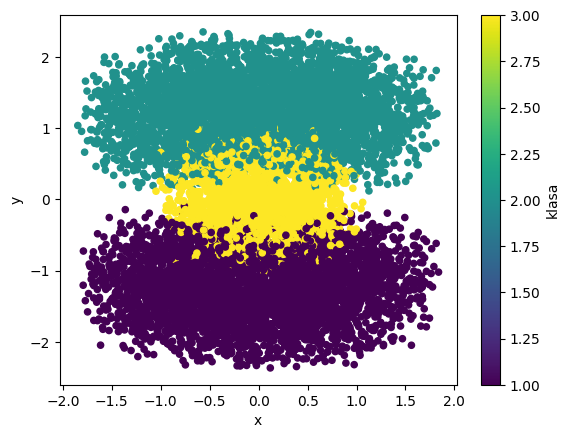

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

df1.plot.scatter(x = 'x', y = 'y', c = 'klasa', colormap = 'viridis')
plt.show()

Rozbijmy go na część uczącą i testową (na piechotę).

In [ ]:
import numpy as np

p = 0.2
split = np.random.rand(len(df1)) < 1-p
train = df1[split]
test = df1[~split]

print(len(df1), ";", len(train), "; ", len(test))
print(test.head())
print(test['x'][0]) # jedno z tych wywoła błąd
print(train['x'][0])


10000 ; 7974 ;  2026
           x         y  klasa
31  0.012072  1.026495      2
32  0.443897 -1.059282      1
55  0.711678 -0.942687      1
56 -0.358962 -1.784570      1
59  1.277357  1.718604      2


KeyError: 0

## Metoda najbliższych sąsiadów z pakietu *sklearn*.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(train[['x', 'y']], train['klasa'])
y_pred = classifier.predict(test[['x', 'y']])

In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(test['klasa'], y_pred))

,0,1,2
0,726,0,42
1,0,803,50
2,42,53,310


W zasadzie zrobione.

Naturalne jest nastepujące:

### Zadanie

Ten model jest bardzo prosty. Może da się go wykonac ,,na piechotę''? Dla każdego punktu w zbiorze testowym znaleźć najbliższy mu w zbiorze uczącym (metryka euklidesowa) i przypisać właściwą klasę. Uprośćmy kwestię remisów: w razie braku jednoznaczności (wiecej niż jeden najbliższy sąsiad) możemy zdecydować dowolnie (np. wybierając klasę pierwszego napotkanego).

Uwaga na **czas wywołania** &mdash; ograniczmy się do pierwszych 20 wartości ze zbioru testowego.

In [ ]:
n = 20
yy_pred = np.zeros(n)

for i in range(n):
  dist = 100 # duża liczba
  k = -1 #nierealna wartość
  for j in range(len(train)):
    dd = ((test.iloc[i, 0] - train.iloc[j, 0])**2 + (test.iloc[i, 1] - train.iloc[j, 1])**2)**(1/2)
    if (dd < dist):
      dist = dd
      k = j
  #print(dist, " ", k)
  #print("--------------------------")
  yy_pred[i] = train.iloc[k, 2]

In [ ]:
pd.crosstab(test.iloc[:n,2], yy_pred, rownames=['Faktyczne'], colnames=['Prognoza'])

Prognoza,1.0,2.0,3.0
Faktyczne,,,
1,10,0,1
2,0,6,0
3,0,0,3


Widać, że trwa to za długo. Dlatego trzeba pomyśleć o lepszej strukturze danych i zorganizowaniu obliczeń.

## Podejcie przez $kd$-drzewa

Pomocniczym narzędziem będzie funkcja do wyznaczania mediany, realizowana we wcześniejszym zadaniu, zmodyfikowana tylko o dodanie wielu wymiarów &mdash; na raz obsługuje się jeden, wybrany.

In [ ]:
def QPos(d, g, m, dim):
  #pomocnicza procedura - sortuje fragment między d a g
  if (d < g):
    x = tablica[np.random.randint(d, g), dim]
  else:
    x = tablica[d, dim]
  # podział elementów
  i = d
  j = g
  while i <= j:
    while tablica[i, dim] < x:
      i += 1
    while tablica[j, dim] > x:
      j -= 1
    if i <= j: #zamiana
      tablica[i], tablica[j] = tablica[j].copy(), tablica[i].copy()
      i += 1
      j -= 1
  # rekurencyjne wywołanie
  if d < j and m <= j:
    QPos(d, j, m, dim)
  if i < g and m >= i:
    QPos(i, g, m, dim)

Sprawdźmy jak to działa

In [ ]:
tablica = train.iloc[:15,::].values.copy()
print(tablica)

[[ 0.76774942 -1.17665442  1.        ]
 [ 0.17273479 -0.57694783  3.        ]
 [ 0.44133935  0.38238156  3.        ]
 [-0.34560289 -0.05898724  3.        ]
 [-0.84428058  0.42679995  3.        ]
 [ 0.53256687 -1.37069672  1.        ]
 [-0.48047862 -0.65843195  3.        ]
 [-0.70398414  1.27653672  2.        ]
 [-0.23668734  0.05954071  3.        ]
 [-0.5066467  -0.46826652  3.        ]
 [-0.39110304  1.32357784  2.        ]
 [-1.34605762 -1.54268749  1.        ]
 [-1.10778104 -0.99693314  1.        ]
 [ 1.11112495 -1.62810701  1.        ]
 [-0.07412579 -1.74436852  1.        ]]


In [ ]:
QPos(0, len(tablica)-1, 7, 0)
wynik = tablica[7]
print(wynik)
print(tablica)

[-0.34560289 -0.05898724  3.        ]
[[-1.10778104 -0.99693314  1.        ]
 [-1.34605762 -1.54268749  1.        ]
 [-0.5066467  -0.46826652  3.        ]
 [-0.70398414  1.27653672  2.        ]
 [-0.84428058  0.42679995  3.        ]
 [-0.48047862 -0.65843195  3.        ]
 [-0.39110304  1.32357784  2.        ]
 [-0.34560289 -0.05898724  3.        ]
 [-0.23668734  0.05954071  3.        ]
 [ 0.17273479 -0.57694783  3.        ]
 [-0.07412579 -1.74436852  1.        ]
 [ 0.44133935  0.38238156  3.        ]
 [ 0.53256687 -1.37069672  1.        ]
 [ 1.11112495 -1.62810701  1.        ]
 [ 0.76774942 -1.17665442  1.        ]]


Zaczynamy tworzyć drzewo w oparciu o wielowymiarową tablicę.

In [ ]:
def new_node(d, g):
  return {'d': d, 'g': g, 'val' : None, 'dim': None, 'left': None, 'right': None}

In [ ]:
tablica = train.values.copy()
print(len(tablica))
root = new_node(0, len(tablica)-1)

7974


In [ ]:
def split_data(t):
  if t['d'] < t['g'] : # więcej niż jeden element
    dim = np.random.randint(0,2)
    t['dim'] = dim
    m = (t['d']+t['g']+1)//2
    QPos(t['d'], t['g'], m, dim) #podział według losowego wymiaru
    t['val'] = tablica[m, dim]
    t['left'] = new_node(t['d'], m-1)
    t['right'] = new_node(m, t['g'])
    split_data(t['left'])
    split_data(t['right'])

split_data(root)

In [ ]:
def find_element(t, x, dist):
  global mindist
  global minindex
  if t['dim'] is None:
    # liśc - jest wartość
    j = t['d']
    dd = ((tablica[j,0]-x[0])**2 + (tablica[j,1]-x[1])**2)**(1/2)
    if dd < mindist:
      mindist = dd
      minindex = j
  else:
    dim = t['dim']
    val = t['val']
    if x[dim] < val:
      find_element(t['left'], x, dist)
      newdist = dist.copy()
      newdist[dim] = val - x[dim]
      if (newdist[0]**2 + newdist[1]**2)**(1/2) < mindist:
        find_element(t['right'], x, newdist)
    else:
      find_element(t['right'], x, dist)
      newdist = dist.copy()
      newdist[dim] = x[dim] - val
      if (newdist[0]**2 + newdist[1]**2)**(1/2) < mindist:
        find_element(t['left'], x, newdist)


In [ ]:
n = 20
yy_pred = np.zeros(n)

for i in range(n):
  mindist = 100 # duża liczba
  minindex = -1 #nierealna wartość
  find_element(root, test.iloc[i,:], [0, 0])
  #print(mindist, " ", minindex)
  #print("--------------------------")
  yy_pred[i] = tablica[minindex, 2]

pd.crosstab(test.iloc[:n,2], yy_pred, rownames=['Faktyczne'], colnames=['Prognoza'])

<ipython-input-40-4ad3f3873d9e>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[dim] < val:
<ipython-input-40-4ad3f3873d9e>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dd = ((tablica[j,0]-x[0])**2 + (tablica[j,1]-x[1])**2)**(1/2)
<ipython-input-40-4ad3f3873d9e>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  newdist[dim] = x[dim] - val
<ipython-input-40-4ad3f3873d9e>:17: FutureWarning: Series.__getitem__ treating keys 

Prognoza,1.0,2.0,3.0
Faktyczne,,,
1,10,0,1
2,0,6,0
3,0,0,3


Skoro działa szybko, sprawnie i skutecznie, sprawdźmy na pełnym zbiorze treningowym. Wynik w 1,142s (trochę gorzej niż *sklearn* &mdash; około 0,3s, ale akceptowalnie). Wyniki są takie same &mdash; to znaczy, że nie było remisów.

In [ ]:
n = len(test)
yy_pred = np.zeros(n)

for i in range(n):
  mindist = 100 # duża liczba
  minindex = -1 #nierealna wartość
  find_element(root, test.iloc[i,:], [0, 0])
  yy_pred[i] = tablica[minindex, 2]

pd.crosstab(test.iloc[:n,2], yy_pred, rownames=['Faktyczne'], colnames=['Prognoza'])

<ipython-input-40-4ad3f3873d9e>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[dim] < val:
<ipython-input-40-4ad3f3873d9e>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dd = ((tablica[j,0]-x[0])**2 + (tablica[j,1]-x[1])**2)**(1/2)
<ipython-input-40-4ad3f3873d9e>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  newdist[dim] = x[dim] - val
<ipython-input-40-4ad3f3873d9e>:17: FutureWarning: Series.__getitem__ treating keys 

Prognoza,1.0,2.0,3.0
Faktyczne,,,
1,726,0,42
2,0,803,50
3,42,53,310
